## Model Evaluation with Supervised Learning Algorithms of Classification with a Pipeline

<div class="alert alert-block alert-info"> 
- In this notebook we will present the preprosseing of the flights data, the application of several Classification models in order to obtain the target and finally an evaluation of the best model obtained with the train dataset, everything through a pipeline:

- We did an Exploration data analisis in a previous notebook to better understand the data set and objective of the prediction.
    
Knowledge of the data set:
    
The information you will have is from the history of air routes. Datasets:

- Date: Flight date.
- Origin_Country : Country of origin.
- Origin_Continent : Continent of origin.
- Destination_Country: Country of destination.
- Destination_Continent: Destination continent.
- Total_flights: Total number of flights.
- Total_seats: Total number of seats.
- Total_ASKs: (Available Seat Kilometer). Target variable. Total seat numbers available by the total number of km these seats have flown.

Our TARGET is **Destination_Country**
   
</div>

<div class="alert alert-success">
<b>Importing the necessary libraries</b>

</div>

In [1]:
# Import basic required libraries
import pandas as pd
import numpy as np 
import json

## Plotting Libraries
import matplotlib.pyplot as plt
import matplotlib_inline
from IPython.display import Image ##use the IPython Image object to display an Image
##To Plot interactively within an IPython notebook
%matplotlib inline 
import matplotlib.image as mpimg
import seaborn as sns 

## Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import basic modules from sklearn
from scipy import stats ## to check normality and variance of columns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler, LabelBinarizer, OrdinalEncoder

## Importn Classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

## Importn Classification models
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb ## XGBoost
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


# To evaluate the models performance
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.datasets import make_classification
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


## Hyper-Parameter tuning & Cross validation
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

# For ploting several model options
from matplotlib import pyplot
from sklearn import tree ## To plot trees
from pprint import pprint ## To plot trees
from sklearn.tree import export_graphviz
import graphviz


<div class="alert alert-success">
<b>Load the dataset for training</b>

- And do a basic check
 
</div>

In [60]:
df = pd.read_csv('train_NEW.csv')
df.head()

,Date,Origin Country,Origin Continent,Destination Country,Destination Continent,Total flights,Total seats,Total ASKs
0,Jul 2009,United Kingdom,Europe,13,Europe,"9,032","1,531,683","2,447,559,137"
1,Apr 2008,Lebanon,Middle East,9,Europe,5,760,"2,389,940"
2,Apr 2005,Switzerland,Europe,11,Europe,"1,471","158,661","66,533,450"
3,Aug 2016,Israel,Middle East,19,Europe,117,"23,366","61,557,637"
4,Feb 2019,Albania,Europe,8,Europe,80,"12,854","9,837,347"


In [29]:
df.shape

(276982, 8)


<div class="alert alert-success">
<b>Pre-pre processing the data</b>

- Here we will:
- Change Date column to date/Time format
- Change *Total flights*, *Total seats* and *Total ASKs* to float numbers
 
</div>

In [61]:
# Convert the 'Date' column to datetime indicating the format in the same column Date
df['Date'] = pd.to_datetime(df['Date'], format='%b %Y')
## But with this we get also a day 01 which is not true
## We creat a column for the Year
df['Year'] = df['Date'].dt.year
## A column for the month
df['Month'] = df['Date'].dt.month
## Drope the column Date
df = df.drop(columns = ['Date'], axis = 1)

## and finally, reorganize the columns so the Year and Month appears at the begining
df_columns = df.columns.to_list()
df = df[df_columns[-2:] + df_columns[:-2]]

## Converting the string/number columns to float

## We do it with a for loop
## We first get again the df_columns list
df_columns = df.columns
## We do the loop for the last 3 columns, the ones we want to convert to float (-3)
for column in df_columns[-3:]: 
    ## Replacing the comma for an empty space
    df[column] = df[column].str.replace(',', '') 
    ## Converting  each column to float and filling nanas with 0
    df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0).astype(float)
    
## Display df
df

,Year,Month,Origin Country,Origin Continent,Destination Country,Destination Continent,Total flights,Total seats,Total ASKs
0,2009,7,United Kingdom,Europe,13,Europe,9032.0,1531683.0,2.447559e+09
1,2008,4,Lebanon,Middle East,9,Europe,5.0,760.0,2.389940e+06
2,2005,4,Switzerland,Europe,11,Europe,1471.0,158661.0,6.653345e+07
3,2016,8,Israel,Middle East,19,Europe,117.0,23366.0,6.155764e+07
4,2019,2,Albania,Europe,8,Europe,80.0,12854.0,9.837347e+06
...,...,...,...,...,...,...,...,...,...
276977,2012,7,Iraq,Middle East,21,Europe,4.0,744.0,2.635372e+06
276978,2007,6,Cyprus,Europe,4,Europe,64.0,9519.0,1.940961e+07
276979,2007,9,Panama,Central America,17,North America,442.0,63061.0,1.612440e+08
276980,2015,11,Russian Federation,Europe,9,Europe,90.0,13422.0,3.014739e+07


<div class="alert alert-success">
<b>Required Significant sample size:</b>

- The sample size n required to obtain a significant sample depends on various factors, including the size of the population, the desired level of precision, and the level of confidence required.

Here are some general guidelines for choosing n:

   - For a population size of less than 10,000, a sample size of 30-50% is generally considered sufficient.
   - For a population size of 10,000-50,000, a sample size of 10-20% is often sufficient.
   - For a population size of 50,000 or more, a sample size of 5-10% is often sufficient.

These are rough guidelines, we decided that to check the models with a bit more of a 10% would be OK beeing in the conservative side, since our data set has 276982 samples.


 
</div>

In [31]:
## Geting a Significant sample from the data set
n = df.shape[0]
fivePer = str(n*0.05)
tenPer = str(n*0.10)
print('My sample range: ' + fivePer + ' - ' + tenPer )

My sample range: 13849.1 - 27698.2


In [62]:
# Obtain a random sample of size 5000
df0 =df.copy()
df = df.sample(n=100000)
df = df.reset_index(drop=True)
df

,Year,Month,Origin Country,Origin Continent,Destination Country,Destination Continent,Total flights,Total seats,Total ASKs
0,2019,12,Turkey,Europe,7,Europe,632.0,114865.0,1.697351e+08
1,2018,4,Saudi Arabia,Middle East,17,North America,73.0,21245.0,2.349352e+08
2,2004,5,Algeria,Africa,2,Europe,2.0,256.0,8.544720e+05
3,2017,12,Vietnam,Asia,1,Asia,4.0,720.0,1.563124e+06
4,2007,10,Russian Federation,Europe,0,Asia,172.0,40217.0,2.419197e+08
...,...,...,...,...,...,...,...,...,...
99995,2013,2,Eritrea,Africa,10,Africa,16.0,2320.0,4.207855e+06
99996,2014,2,South Africa,Africa,21,Europe,56.0,19880.0,1.852599e+08
99997,2009,4,United Kingdom,Europe,15,Europe,33039.0,2844789.0,1.188990e+09
99998,2004,1,Turkey,Europe,15,Europe,218.0,34227.0,8.811361e+07


</div>

<div class="alert alert-success">

- Check if the sample dataset is significanly equal to the whole dataset

- We use several functions to check the varuance of both samples and see if they are the same
</div>

In [ ]:
# Define a function to check normality
## For checking normality, I used Shapiro-Wilk’s W test which is generally preferred for 
## smaller samples however there are other options like Kolmogorov-Smirnov and D’Agostino and Pearson’s test. 
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    #print("p value:%.6f" % p_value_normality)
    if p_value_normality <0.05:
        text  = "Reject null hypothesis >> The data is not normally distributed"
        ##print("Reject null hypothesis >> The data is not normally distributed")
    else:
        text = "Fail to reject null hypothesis >> The data is normally distributed"
        ##print("Fail to reject null hypothesis >> The data is normally distributed")
    return text, p_value_normality
        
## Define a function to check variance
## For checking variance homogeneity, I preferred Levene’s test  
## but you can also check Bartlett’s test
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var = stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        text = "Reject null hypothesis >> The variances of the samples are different."
        ##print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        text = "Fail to reject null hypothesis >> The variances of the samples are same."
        ##print("Fail to reject null hypothesis >> The variances of the samples are same.")
    return text, p_value_var

##Function to plot the distribution and a boxplot for each column with a loop
#Introduce the df, df[['CRIM', 'ZN']]
##It alsdo includes in the plot the normality test
def plotsPreProcessing(df):
    for column in df:
        text = check_normality(df[column])
        fig, axes = plt.subplots(1,2, figsize = (15,5))
        fig.suptitle('OUTLIERS AND DISTRIBUTION OF COLUMN' + '\n\n' + text[0] + '   p_value =' + str(round(text[1], 4)))
        sns.histplot(ax=axes[1], data=df, x=df[column], bins=15, color='orange', kde= True)
        sns.boxplot(ax=axes[0], x =df[column])

In [ ]:
df0 = pd.read_csv('train_NEW.csv')


In [ ]:
check_variance_homogeneity(df['Total flights'], df0['Total flights'])

In [ ]:
check_variance_homogeneity(df['Total seats'], df0['Total seats'])

In [ ]:
check_variance_homogeneity(df['Total ASKs'], df0['Total ASKs'])

In [ ]:
## After checking the variance I drop everything on the df0 dataframe to free memoru¡y space
df0 = df0.iloc[0:0]
df0

<div class="alert alert-success">

- After checking the variances between the two dataframes we observed that most probably the sample is representative of the whole population, and we drop the df0
</div>

<div class="alert alert-success">
<b>Pipeline - Pre-processing</b>

- For the pre-processing of the dataset, we will apply diferent prerocessing according to the types of datasets and availablae time.

1. **"Manual" ordinal encoding for origine and destination country** **NOT** trhough Pipeline:
    
    - For the Origin countries, we will use the first 25 numbers and codes from the dictionary probided, and follow with ordinal code adding one each time a loop is finding a new label.

    
2. **Origin and destination Continents will be encoded with One-Hote encoder** sinse they are categorical and do not have any implicid order

    
3. We apply **MinMax scaler** for 'Origin Country', 'Year', 'Month' columns
    
4. **Robust scaler** for 'Total flights', 'Total seats', 'Total ASKs' columns
    
**Notes**: We do not treat Year and Month as cyclical data althought we have seen it is and it does have some seasonal importance because after checking diferent pre-processing we have come out that it is not improving the model. This, with more time, could be rethinked and do some feature enginyering to see if it is really like this or it could help to predict
 
</div>

In [63]:
# read the JSON file into a dictionary
with open('encode_countries.json', 'r') as f:
    #label_mapping = json.load(f)
    encodedCountries = json.load(f)
    
## Creat a list with all the unique labels of countris
unique_OriginContry = df['Origin Country'].unique()

## Loop throug the countries list
for label in unique_OriginContry:
    ## if the label is not in the countries dictionary, assingne 1 more of the maximum number and addit to the list
    if label not in encodedCountries:
        encodedCountries[label] = max(encodedCountries.values()) + 1

## Map the Origin Country column with the dicctionary of codes
df['Origin Country'] = df['Origin Country'].map(encodedCountries)

# ## Map the Origin Continent column with the dicctionary of codes
# df['OriginContinentsEncoded'] = df['Origin Continent'].map(continents_Dic)

# ## Map the Origin Continent column with the dicctionary of codes
# df['DestinationContinentsEncoded'] = df['Destination Continent'].map(continents_Dic)

##Show results
df

,Year,Month,Origin Country,Origin Continent,Destination Country,Destination Continent,Total flights,Total seats,Total ASKs
0,2019,12,8,Europe,7,Europe,632.0,114865.0,1.697351e+08
1,2018,4,25,Middle East,17,North America,73.0,21245.0,2.349352e+08
2,2004,5,26,Africa,2,Europe,2.0,256.0,8.544720e+05
3,2017,12,27,Asia,1,Asia,4.0,720.0,1.563124e+06
4,2007,10,2,Europe,0,Asia,172.0,40217.0,2.419197e+08
...,...,...,...,...,...,...,...,...,...
99995,2013,2,146,Africa,10,Africa,16.0,2320.0,4.207855e+06
99996,2014,2,16,Africa,21,Europe,56.0,19880.0,1.852599e+08
99997,2009,4,15,Europe,15,Europe,33039.0,2844789.0,1.188990e+09
99998,2004,1,8,Europe,15,Europe,218.0,34227.0,8.811361e+07


<div class="alert alert-success">
<b>Separate Features from Target</b>

- We need to separate the dataframe in a features data set, X, with all the dependant variables, and a target dataset, y, with the independant variable, our target.

</div>


In [64]:
## Create features df
X = df.drop(['Destination Country'], axis=1)

## Crete target df
y = df['Destination Country']

## Display X
X

,Year,Month,Origin Country,Origin Continent,Destination Continent,Total flights,Total seats,Total ASKs
0,2019,12,8,Europe,Europe,632.0,114865.0,1.697351e+08
1,2018,4,25,Middle East,North America,73.0,21245.0,2.349352e+08
2,2004,5,26,Africa,Europe,2.0,256.0,8.544720e+05
3,2017,12,27,Asia,Asia,4.0,720.0,1.563124e+06
4,2007,10,2,Europe,Asia,172.0,40217.0,2.419197e+08
...,...,...,...,...,...,...,...,...
99995,2013,2,146,Africa,Africa,16.0,2320.0,4.207855e+06
99996,2014,2,16,Africa,Europe,56.0,19880.0,1.852599e+08
99997,2009,4,15,Europe,Europe,33039.0,2844789.0,1.188990e+09
99998,2004,1,8,Europe,Europe,218.0,34227.0,8.811361e+07


<div class="alert alert-success">
<b>Prepare Pipeline</b>

</div>

In [65]:
numeric_features = ['Total flights', 'Total seats', 'Total ASKs']
numeric_transformer = Pipeline(
    [
        ('imputer_num', SimpleImputer(strategy = 'median')),
        ('robust', RobustScaler())
    ]
)


categorical_features = ['Origin Continent', 'Destination Continent']
categorical_transformer = Pipeline(
    [
        ('imputer_cat', SimpleImputer(strategy = 'most_frequent', fill_value = 'missing')),
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ]
)

numeric_features_minmax = ['Origin Country', 'Year', 'Month']
numeric_transformer_minmax = Pipeline(
    [
        ('imputer_num', SimpleImputer(strategy = 'median')),
        ('minmax', MinMaxScaler())
    ]
)

<div class="alert alert-success">
<b>Creat Object processor</b>


</div>


In [66]:
preprocessor = ColumnTransformer(
    [
        ('categoricals', categorical_transformer, categorical_features),
        ('numericals', numeric_transformer, numeric_features),
        ('numericals_minmax', numeric_transformer_minmax, numeric_features_minmax)
        
    ],
    remainder = 'drop'
)

<div class="alert alert-success">
<b>Look for the best model</b>

- We try different models to see which one could performe the best with this data
    
- We put all the models in the pipeline and do a cross validation
    
- We will use a cross-validation to look for the model that initially gives us the best results for f1_macro

</div>

In [67]:
## Loop per trobar el millor model

knc = KNeighborsClassifier()
gnb = GaussianNB()
dtc = DecisionTreeClassifier(random_state = 42)
svc = SVC(random_state = 42)
rfc = RandomForestClassifier(random_state = 42)


In [68]:
evaluation = pd.DataFrame({'model':['knc','gnb','dtc','svc','rfc']})

In [39]:
models = [knc, gnb, dtc, svc, rfc]
score_mean = []
score_std = []

for model in models:
    pipeline = Pipeline(
        [
            ('preprocessing', preprocessor),
            ('model', model)
        ]
    )
    score = cross_val_score(pipeline, X, y, cv=5, scoring='f1_macro', error_score='raise')
    score_mean.append(score.mean())
    score_std.append(score.std())

In [40]:
evaluation['f1__macro_cv'] = score_mean
evaluation['f1_macro_std_cv'] = score_std
evaluation

,model,f1__macro_cv,f1_macro_std_cv
0,knc,0.431902,0.006814
1,gnb,0.177379,0.003731
2,dtc,0.658262,0.004981
3,svc,0.023378,0.002447
4,rfc,0.693670,0.003601


<div class="alert alert-success">
<b>Evaluation of the models</b>

- We observe that the model that better perform is the Random Forest Classifier, from now on we proceed with this one

</div>


<div class="alert alert-success">
<b>Hyper-Parameters tunning</b>

- We introduce in the pipeline a part from the processor object the model, then weuse a randomized grid search to look for hte best parameters

</div>


In [69]:
pipeline = Pipeline(
    [
        ('preprocessing', preprocessor),
        ('model', RandomForestClassifier(random_state = 42))
    ]
)


### Creat ta grid to search in
### Here we use the double underscore to identify the model so the piple line know where to apply the parameter
params = {
    'model__n_estimators': [50, 100, 200, 500, 1000],
    'model__max_depth': [2, 4, 8, 16, 32, None],
    'model__min_samples_split': [1, 2, 4, 8],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features' : ['auto', 'sqrt'],
    'model__bootstrap' :[True, False],
    'model__random_state': [42]
}

# rskf = RepeatedStratifiedKFold(n_splits = 3, n_repeats = 2, random_state = 42)
## Stratified K-Fold cross-validation with n folds
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv = RandomizedSearchCV(pipeline, params, cv = kfold, scoring ='f1_macro', n_jobs = -1)

cv.fit(X, y)

print(f'Best F1-score: {cv.best_score_:.3f}\n')
print(f'Best parameter set: {cv.best_params_}\n')


Best F1-score: 0.821

Best parameter set: {'model__random_state': 42, 'model__n_estimators': 200, 'model__min_samples_split': 8, 'model__min_samples_leaf': 4, 'model__max_features': 'auto', 'model__max_depth': None, 'model__bootstrap': False}



<div class="alert alert-success">
<b>Splitting the dataset in test and trains sets</b>

</div>

In [70]:
## Split the features, X, and the target, y, into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

<div class="alert alert-success">
<b>Predicting with the Random forest and evaluation</b>

- Here we run again our pipeline this time but, with just one models with the best parameters obtained in the random grid search
    
- then, we do a prediccion of the X_test to get the predicted target an be able to compare with the real target of the test set.
    
</div>

In [71]:
pipeline = Pipeline(
    [
        ('preprocessing', preprocessor),
        ('model', RandomForestClassifier(n_estimators= 200, 
                                 min_samples_split = 8,
                                 min_samples_leaf = 4, 
                                 max_features = 'auto',
                                 max_depth = None,
                                 bootstrap = False, 
                                 random_state = 42))
    ]
)

pipeline.fit(X_train, y_train)
print('Accuracy score: {0:.2f}'.format(pipeline.score(X_test, y_test)))

y_pred = pipeline.predict(X_test)

# Compute confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Accuracy score: 0.81
Confusion Matrix:
 [[ 620   18   10    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0   45    0    0]
 [  30  539   16    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    6    0    0]
 [   8    6  915    0   28    8   14   16   34   13    0    7    0   13
    12   12    0    0    0   10   20   19    5   15    0]
 [   0    0    0  900    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0   54]
 [   0    0    9    0  593   11    7   28   19   11    0   10    0    9
    15    2    0    0    0   25   22    1    0   22    0]
 [   0    0   11    0   15  895    3   18   23   16    0   57    0   17
     9   62    0    0    0    7    1   19    0    4    0]
 [   0    0   16    0   13    7  335    7   71   10    0    2    0   11
     8    3    0    0    0   14   19    3    0   21    0]
 [   0    0   17    0   33   43    9  589   24   1

<div class="alert alert-success">
<b>Presenting the results</b>

- We have shown the classification report and te confussion matrix

- Bellow we show the confussion matrix with a heatmap and the names of the countries

- The avarage f1 macro is 0.81, so pretty good.
    
- Bellow, we comment more on the results
    
</div>

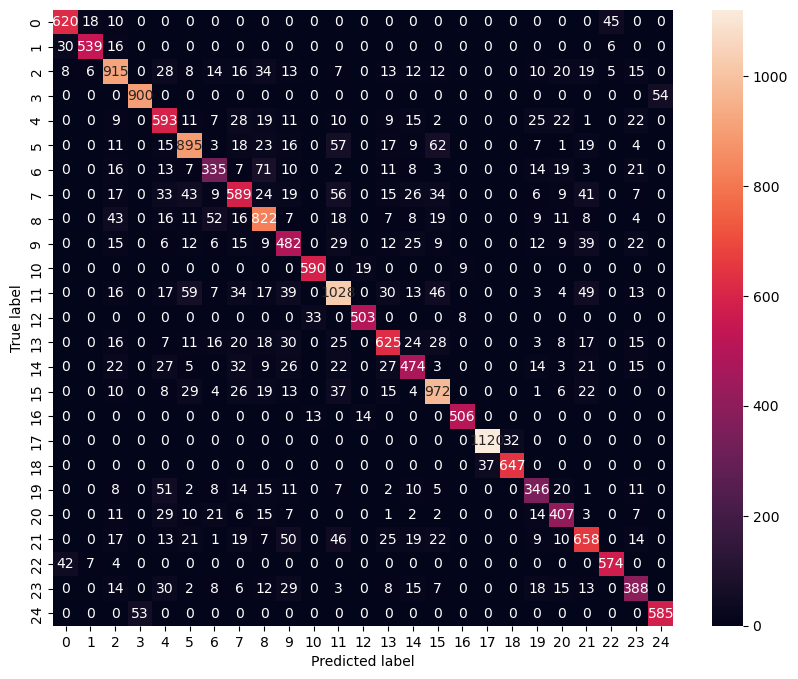

In [72]:
###Figure size:
plt.figure(figsize=(10,8))
 
##Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [73]:
## read the JSON file into a dictionary
with open('encode_countries.json', 'r') as f:
    encodingCountries = json.load(f)

## Display the dictionary to be sure everything is correct
encodingCountries

{'China': 0,
 'India': 1,
 'Russian Federation': 2,
 'United Arab Emirates': 3,
 'Austria': 4,
 'Germany': 5,
 'Greece': 6,
 'Italy': 7,
 'Turkey': 8,
 'Belgium': 9,
 'Egypt': 10,
 'France': 11,
 'Morocco': 12,
 'Spain': 13,
 'Switzerland': 14,
 'United Kingdom': 15,
 'South Africa': 16,
 'United States': 17,
 'Canada': 18,
 'Czech Republic': 19,
 'Ukraine': 20,
 'Netherlands': 21,
 'Thailand': 22,
 'Denmark': 23,
 'Qatar': 24}

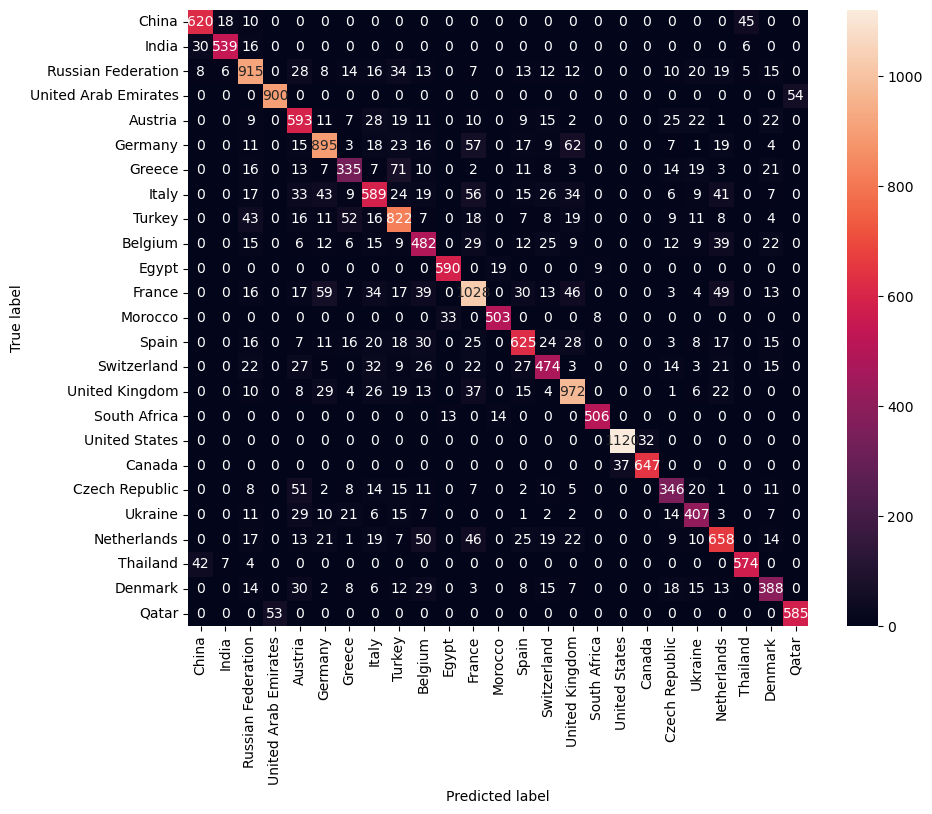

In [74]:
###Figure size:
plt.figure(figsize=(10,8))

## Create classes names list using country names
classes_names = list(encodingCountries.keys())

# Convert the confusion matrix to a DataFrame with class names as index and column names
cm = pd.DataFrame(conf_matrix, columns=classes_names, index=classes_names)

##Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [75]:
## Different metrics can also be called separetley:
## Model Accuracy: overall performance of the model, not very usefull
print("Accuracy:", accuracy_score(y_test, y_pred))

## Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, average='weighted'))

## Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred, average='weighted'))

## Model f1 Score: harmonic mean of both precision and recall
print("f1_score:", metrics.f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.80565
Precision: 0.8060774864234902
Recall: 0.80565
f1_score: 0.8054477229800181


<div class="alert alert-success">
<b>Thoughts on the results</b>

- If we observe the heatmap of the confusion matrix we clearly see that the highest numbers, in redish, are in the diagonal which corresponds to the **True positive**, so, the ones that the model got right. There fore, the model  was quite accurate.

- The bluish collors corresponds to the False negative and fals Positive. which are represented by the recall and the precision. Looking at this numbers below, well they are quite similar and equilibratet, so no more, fals positive thant false negatives.
    - Precision: 0.8060774864234902
    - Recall: 0.80565

- While 0.80 is not a super-high score is not bad, it could be said in general (since all scores are very similar) that **around the 80% of times, these model gets the target right,** we could aim for more, but we didn't had much time.
    
- So, as **future work** is clearly trying to implement better the year and month and its implicit cyclicity, I definitley think it could have an impact since in the exploration of the dataset we clearly have seen a year sesonality of the amount of flights.

    
</div>